<a href="https://colab.research.google.com/github/DaniliukK95/Drops_Of_Jupyter/blob/Amy-Ying-Lin/cleaned1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import balanced_accuracy_score, confusion_matrix

In [ ]:
%matplotlib notebook

In [ ]:
# change your file path to load it
test_df = pd.read_csv('/Users/yinglin/Desktop/NHIS/adult21.csv')
test_df.head()

,URBRRL,RATCAT_A,IMPINCFLG_A,CVDVAC2YR_A,CVDVAC2MR_A,CVDVAC1YR_A,CVDVAC1MR_A,SHTCVD19AV_A,SHTCVD19NM_A,SHTCVD19_A,...,PROXYREL_A,PROXY_A,AVAIL_A,HHSTAT_A,INTV_MON,RECTYPE,IMPNUM_A,WTFA_A,HHX,POVRATTC_A
0,4,7,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1,1,1,10,1,5423.324,H056808,1.93
1,4,12,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1,1,1,10,1,3832.196,H018779,4.45
2,4,14,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1,1,1,10,1,3422.661,H049265,5.94
3,3,11,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1,1,1,10,1,12960.165,H007699,3.70
4,1,6,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1,1,1,10,1,9284.618,H066034,1.66


In [ ]:
# new df with variables wanted
# NOTE: inctotoal_a is not in the col.

clean_df = test_df.loc[:, [ 'HHX','REGION','AGEP_A','SEX_A', 'EDUCP_A', 'HISP_A', 'HISPALLP_A', 'HISDETP_A', 'RACEALLP_A',
                         'PHSTAT_A', 'DIBEV_A', 'PREDIB_A', 'DIBPILL_A', 'DIBINS_A', 'DIBTYPE_A', 'KIDWEAKEV_A', 'WEIGHTLBTC_A', 'BMICAT_A',
                         'COVER_A', 'COVER65_A', 'MCPART_A', 'MCCHOICE_A', 'MCHMO_A', 'MCADVR_A', 'MCPARTD_A', 'MAXCHNG_A', 'MAPREM_A',
                         'MADEDUC_A', 'MAHDHP_A', 'MAHDHP_A', 'MAFLG_A', 'PLN1PAY4_A', 'PLN2PAY4_A', 'HISTOPELIG_A',
                         'POVRATTC_A', 'RATCAT_A', 'INCWRKO_A', 'INCSSISSDI_A', 'INCRETIRE_A'
                          ] ]
clean_df

,HHX,REGION,AGEP_A,SEX_A,EDUCP_A,HISP_A,HISPALLP_A,HISDETP_A,RACEALLP_A,PHSTAT_A,...,MAHDHP_A,MAFLG_A,PLN1PAY4_A,PLN2PAY4_A,HISTOPELIG_A,POVRATTC_A,RATCAT_A,INCWRKO_A,INCSSISSDI_A,INCRETIRE_A
0,H056808,3,50,1,1,2,2,3,1,2,...,NaN,NaN,2.0,NaN,NaN,1.93,7,1,2.0,2.0
1,H018779,3,53,1,7,2,3,3,2,2,...,NaN,NaN,2.0,NaN,NaN,4.45,12,1,2.0,2.0
2,H049265,3,56,1,8,2,2,3,1,2,...,NaN,NaN,2.0,NaN,NaN,5.94,14,1,2.0,2.0
3,H007699,3,57,2,5,2,2,3,1,4,...,NaN,NaN,NaN,NaN,NaN,3.70,11,1,1.0,1.0
4,H066034,3,25,1,4,2,3,3,2,3,...,NaN,NaN,2.0,NaN,NaN,1.66,6,8,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29477,H012375,4,70,2,9,2,2,3,1,2,...,NaN,NaN,2.0,NaN,NaN,5.11,14,2,2.0,2.0
29478,H052160,4,35,2,7,1,1,2,8,4,...,NaN,NaN,2.0,NaN,NaN,3.03,10,1,2.0,2.0
29479,H051563,4,72,2,4,2,2,3,1,2,...,NaN,NaN,NaN,NaN,NaN,2.07,8,2,2.0,2.0
29480,H058432,4,58,1,5,2,2,3,1,3,...,NaN,NaN,NaN,NaN,NaN,2.05,8,2,1.0,2.0


In [ ]:
# rename clean_df col.
clean_df2 = clean_df.rename(columns={'HHX':'Unique ID',
                                    'REGION': 'Household region',
                                    'AGEP_A': 'Age of sample adult',
                                    'SEX_A': 'Sex of sample adult',
                                    'EDUCP_A': 'Education of sample adult',
                                    'HISP_A': 'Hispanic ethnicity of SA',
                                    'HISPALLP_A': 'Single + Mult race gps w Hispanic origin',
                                    'HISDETP_A': 'Hispanic origin detail',
                                    'RACEALLP_A': 'Single and multiple race groups',
                                   
                                    'PHSTAT_A': 'General health status',
                                    'DIBEV_A': 'Ever had Diabetes?',
                                    'PREDIB_A': 'Ever had pre-diabetes?', 
                                    'DIBPILL_A': 'Taking diabetic pills',
                                    'DIBINS_A': 'Taking insuliin',
                                    'DIBTYPE_A': 'Diabetes type',
                                    'KIDWEAKEV_A': 'Ever had weak/failing kidneys',
                                    'WEIGHTLBTC_A': 'Weight without shoes (pounds)',
                                    'BMICAT_A': 'Categorical Body Mass Index',
                                    
                                    'COVER_A' : 'Health insurance hierarchy under 65',
                                    'COVER65_A': 'Health insurance hierarchy under 65',
                                    'MCPART_A': 'Type of Medicare coverage',                                         
                                    'MCCHOICE_A': 'Enrolled in Medicare Advantage Plan', 
                                    'MCHMO_A': 'Medicare HMO',
                                    'MCADVR_A': 'Medicare Advantage Plan',
                                    'MCPARTD_A': 'Medicare Part D', 
                                    'MAXCHNG_A': 'Medicaid through Marketplace ',
                                    'MAPREM_A': 'Medicaid premium',
                                    'MADEDUC_A': 'Medicaid deductible', 
                                    'MAHDHP_A': 'Medicaid HDHP', 
                                    'MAFLG_A': 'Medicaid reassignment flag',
                                    'PLN1PAY4_A': 'Paid for by Medicare - plan 1',
                                    'PLN2PAY4_A': 'Paid for by Medicare - plan 2',
                                    'HISTOPELIG_A': 'Not eligible for Medicaid, CHIP, or other public coverage',
                                    
                                    'POVRATTC_A': 'SA family poverty ratio',
                                    'RATCAT_A': 'Ratio of family income to poverty threshold for SA’s family',
                                    'INCWRKO_A': 'income from wages',
                                    'INCSSISSDI_A': 'income from SSI SSDI',
                                    'INCRETIRE_A': 'income from retirement' })
                           


clean_df2



,Unique ID,Household region,Age of sample adult,Sex of sample adult,Education of sample adult,Hispanic ethnicity of SA,Single + Mult race gps w Hispanic origin,Hispanic origin detail,Single and multiple race groups,General health status,...,Medicaid HDHP,Medicaid reassignment flag,Paid for by Medicare - plan 1,Paid for by Medicare - plan 2,"Not eligible for Medicaid, CHIP, or other public coverage",SA family poverty ratio,Ratio of family income to poverty threshold for SA’s family,income from wages,income from SSI SSDI,income from retirement
0,H056808,3,50,1,1,2,2,3,1,2,...,NaN,NaN,2.0,NaN,NaN,1.93,7,1,2.0,2.0
1,H018779,3,53,1,7,2,3,3,2,2,...,NaN,NaN,2.0,NaN,NaN,4.45,12,1,2.0,2.0
2,H049265,3,56,1,8,2,2,3,1,2,...,NaN,NaN,2.0,NaN,NaN,5.94,14,1,2.0,2.0
3,H007699,3,57,2,5,2,2,3,1,4,...,NaN,NaN,NaN,NaN,NaN,3.70,11,1,1.0,1.0
4,H066034,3,25,1,4,2,3,3,2,3,...,NaN,NaN,2.0,NaN,NaN,1.66,6,8,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29477,H012375,4,70,2,9,2,2,3,1,2,...,NaN,NaN,2.0,NaN,NaN,5.11,14,2,2.0,2.0
29478,H052160,4,35,2,7,1,1,2,8,4,...,NaN,NaN,2.0,NaN,NaN,3.03,10,1,2.0,2.0
29479,H051563,4,72,2,4,2,2,3,1,2,...,NaN,NaN,NaN,NaN,NaN,2.07,8,2,2.0,2.0
29480,H058432,4,58,1,5,2,2,3,1,3,...,NaN,NaN,NaN,NaN,NaN,2.05,8,2,1.0,2.0


## correlation bet. taking diab. pill and income from wates

In [ ]:
# taking diab. pill & income from wages cols
clean_df3 = clean_df2.loc[:, ['Taking diabetic pills', 'income from wages'] ]
clean_df3

,Taking diabetic pills,income from wages
0,1.0,1
1,1.0,1
2,NaN,1
3,NaN,1
4,NaN,8
...,...,...
29477,NaN,2
29478,1.0,1
29479,NaN,2
29480,NaN,2


In [ ]:
# can't pd.get_dummies and .loc[] together
#clean_df3 = pd.get_dummies(clean_df3.loc[:,['Taking diabetic pills',
  #                                            'income from wages'] ] )
#clean_df3

In [ ]:
# .dropna()
clean_df4 = clean_df3.dropna()
clean_df4

,Taking diabetic pills,income from wages
0,1.0,1
1,1.0,1
8,2.0,1
12,1.0,8
15,2.0,1
...,...,...
29470,1.0,2
29473,1.0,2
29476,1.0,1
29478,1.0,1


### splite the data into training and testing

pandas.get_dummies(data, columns='')

convert categorical variable into dummy/indicator variables

In [ ]:
# conver cate. var. into indicators
clean_df5 = pd.get_dummies(clean_df4, columns=['Taking diabetic pills',
                                              'income from wages'])
clean_df5

,Taking diabetic pills_1.0,Taking diabetic pills_2.0,Taking diabetic pills_7.0,Taking diabetic pills_9.0,income from wages_1,income from wages_2,income from wages_7,income from wages_8,income from wages_9
0,1,0,0,0,1,0,0,0,0
1,1,0,0,0,1,0,0,0,0
8,0,1,0,0,1,0,0,0,0
12,1,0,0,0,0,0,0,1,0
15,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
29470,1,0,0,0,0,1,0,0,0
29473,1,0,0,0,0,1,0,0,0
29476,1,0,0,0,1,0,0,0,0
29478,1,0,0,0,1,0,0,0,0


In [ ]:
# drop anything but 'taking diabetic pill_1.0' (target)
clean_df6 = clean_df5.drop(columns={'Taking diabetic pills_2.0', 'Taking diabetic pills_7.0','Taking diabetic pills_9.0'})
clean_df6

,Taking diabetic pills_1.0,income from wages_1,income from wages_2,income from wages_7,income from wages_8,income from wages_9
0,1,1,0,0,0,0
1,1,1,0,0,0,0
8,0,1,0,0,0,0
12,1,0,0,0,1,0
15,0,1,0,0,0,0
...,...,...,...,...,...,...
29470,1,0,1,0,0,0
29473,1,0,1,0,0,0
29476,1,1,0,0,0,0
29478,1,1,0,0,0,0


In [ ]:
# create our features
X = clean_df6.drop(columns=['Taking diabetic pills_1.0'])
X.head()

,income from wages_1,income from wages_2,income from wages_7,income from wages_8,income from wages_9
0,1,0,0,0,0
1,1,0,0,0,0
8,1,0,0,0,0
12,0,0,0,1,0
15,1,0,0,0,0


In [ ]:
# stats of X 
X.describe()

,income from wages_1,income from wages_2,income from wages_7,income from wages_8,income from wages_9
count,5702.000000,5702.000000,5702.000000,5702.000000,5702.000000
mean,0.561382,0.398281,0.006138,0.033497,0.000702
std,0.496261,0.489587,0.078113,0.179946,0.026479
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# create the target
y = clean_df6['Taking diabetic pills_1.0']
y[:5]

0     1
1     1
8     0
12    1
15    0
Name: Taking diabetic pills_1.0, dtype: uint8

In [ ]:
# check the balance of the target value
y.value_counts()

# result: good, 1:1 ratio of taking vs. not taking, no need to resample the data

0    2897
1    2805
Name: Taking diabetic pills_1.0, dtype: int64

### Split the data into train and test set

In [ ]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [ ]:
# create a scaler instance
import sklearn as skl
X_scaler = skl.preprocessing.StandardScaler()

#from sklearn.preprocessing import StandardScaler

In [ ]:
# fit/train the scaler
X_scaler.fit(X_train)

StandardScaler()

In [ ]:
# scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
print (X_train_scaled)

[[-1.1262482   1.22617816 -0.0868335  -0.18600958 -0.02163205]
 [-1.1262482   1.22617816 -0.0868335  -0.18600958 -0.02163205]
 [-1.1262482   1.22617816 -0.0868335  -0.18600958 -0.02163205]
 ...
 [-1.1262482   1.22617816 -0.0868335  -0.18600958 -0.02163205]
 [-1.1262482   1.22617816 -0.0868335  -0.18600958 -0.02163205]
 [ 0.88790375 -0.81554217 -0.0868335  -0.18600958 -0.02163205]]


In [ ]:
print(X_test_scaled)

[[ 0.88790375 -0.81554217 -0.0868335  -0.18600958 -0.02163205]
 [-1.1262482   1.22617816 -0.0868335  -0.18600958 -0.02163205]
 [ 0.88790375 -0.81554217 -0.0868335  -0.18600958 -0.02163205]
 ...
 [-1.1262482   1.22617816 -0.0868335  -0.18600958 -0.02163205]
 [ 0.88790375 -0.81554217 -0.0868335  -0.18600958 -0.02163205]
 [ 0.88790375 -0.81554217 -0.0868335  -0.18600958 -0.02163205]]


In [ ]:
# 75% train, 25% test 
print(X_train_scaled.shape)
print(X_test_scaled.shape)

(4276, 5)
(1426, 5)


In [ ]:
# 75% train, 25% test 
print(y_train.shape)
print(y_test.shape)

(4276,)
(1426,)


In [ ]:
# create a logistic regression model
model = LogisticRegression(solver='lbfgs', random_state=1)
model

#model.fit(X_scaled, y)

LogisticRegression(random_state=1)

In [ ]:
# fit (train) model using the training data
model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=1)

### make predictions

In [ ]:
# # predict outcomes for the test data set
predictions = model.predict(X_test_scaled)
pd.DataFrame( {'Prediction': predictions, 'Acutal': y_test} )

,Prediction,Acutal
28868,0,0
12947,1,1
3527,0,0
16349,0,0
5473,1,1
...,...,...
28848,1,0
15034,1,1
25553,1,0
21590,0,1


In [ ]:
# cal. the balanced accuracy score
y_pred = model.predict(X_test_scaled)
balanced_accuracy_score(y_test, y_pred)

# poor correlation between income and diabetes 

0.526889665010576

### graph of diabetic vs. income

In [ ]:
clean_df4

,Taking diabetic pills,income from wages
0,1.0,1
1,1.0,1
8,2.0,1
12,1.0,8
15,2.0,1
...,...,...
29470,1.0,2
29473,1.0,2
29476,1.0,1
29478,1.0,1


<IPython.core.display.Javascript object>


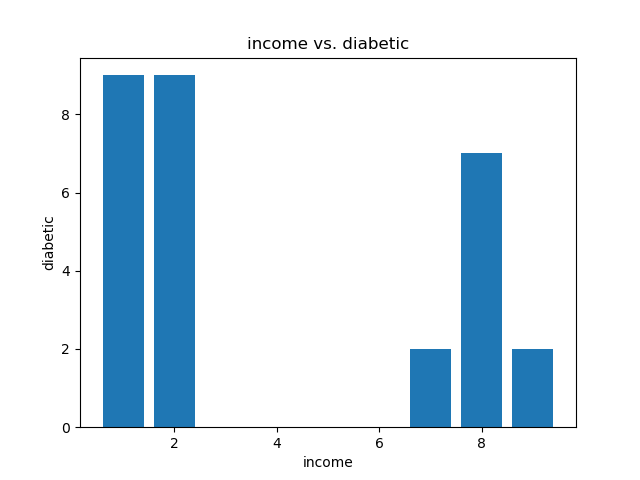

Text(0, 0.5, 'diabetic')

In [ ]:
# try bar ? not useful 
y = clean_df4["Taking diabetic pills"]
x = clean_df4['income from wages']
plt.bar(x, y)

plt.title('income vs. diabetic')
plt.xlabel('income')
plt.ylabel('diabetic')

## looping over 38 cat. variables

In [ ]:
# define XY df and make a copy by .copy()
XY = clean_df2 [ [column, 'Taking diabetic pills'] ].copy()
XY

,income from retirement,Taking diabetic pills
0,2.0,1.0
1,2.0,1.0
2,2.0,NaN
3,1.0,NaN
4,NaN,NaN
...,...,...
29477,2.0,NaN
29478,2.0,1.0
29479,2.0,NaN
29480,2.0,NaN


In [ ]:
# drop na by .dropna()
XY = XY.dropna()
XY

,income from retirement,Taking diabetic pills
0,2.0,1.0
1,2.0,1.0
8,2.0,2.0
15,1.0,2.0
21,1.0,1.0
...,...,...
29470,1.0,1.0
29473,2.0,1.0
29476,1.0,1.0
29478,2.0,1.0


In [ ]:
# if : print
if len( XY > 0):
    print ("XY is greater than 0")

XY is greater than 0


In [ ]:
# len(XY) > 0 always?
target_column = 'Taking diabetic pills'

for column in clean_df2.columns.values:
    if target_column != column:
        XY = clean_df2[ [column, 'Taking diabetic pills'] ].copy()
        XY = XY.dropna()
        if len( XY ) > 0:
            print ("XY > 0")

XY > 0
XY > 0
XY > 0
XY > 0
XY > 0
XY > 0
XY > 0
XY > 0
XY > 0
XY > 0
XY > 0
XY > 0
XY > 0
XY > 0
XY > 0
XY > 0
XY > 0
XY > 0
XY > 0
XY > 0
XY > 0
XY > 0
XY > 0
XY > 0
XY > 0
XY > 0
XY > 0
XY > 0
XY > 0
XY > 0
XY > 0
XY > 0
XY > 0
XY > 0
XY > 0
XY > 0


In [ ]:
# what is the length of XY df
len(XY)

5484

In [ ]:
# There are 9 type of income from retirement?
XY.value_counts()

income from retirement  Taking diabetic pills
2.0                     2.0                      1913
                        1.0                      1751
1.0                     1.0                       922
                        2.0                       845
7.0                     2.0                        13
                        1.0                        12
9.0                     1.0                         8
                        2.0                         7
1.0                     9.0                         5
8.0                     2.0                         4
2.0                     9.0                         2
1.0                     7.0                         1
8.0                     1.0                         1
dtype: int64

In [ ]:
X = pd.get_dummies( XY[ column ] )

In [ ]:
import sklearn as skl

target_column = "Taking diabetic pills"

target_column_onehot = '1.0'

for column in clean_df2.columns.values:
    if target_column != column:
        XY = clean_df2[ [column,"Taking diabetic pills"] ].copy()
        XY = XY.dropna()
        X = pd.get_dummies( XY[ column ].astype('str') )
        y = pd.get_dummies( XY[ target_column ].astype('str') ) 
        y = y[ target_column_onehot ]
        print(column,X.shape,y.shape)
        X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)
        X_scaler = skl.preprocessing.StandardScaler()
        X_scaler.fit(X_train)
        X_train_scaled = X_scaler.transform(X_train)
        X_test_scaled = X_scaler.transform(X_test)
        model = LogisticRegression(solver='lbfgs', random_state=1)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        print( column, "score", balanced_accuracy_score(y_test, y_pred) )
    #break

Unique ID (5702, 5702) (5702,)
Unique ID score 0.5
Household region (5702, 4) (5702,)
Household region score 0.49483890009346254
Age of sample adult (5702, 70) (5702,)
Age of sample adult score 0.542354272221949
Sex of sample adult (5702, 2) (5702,)
Sex of sample adult score 0.5490953809828324
Education of sample adult (5702, 12) (5702,)
Education of sample adult score 0.5399783560430912
Hispanic ethnicity of SA (5702, 2) (5702,)
Hispanic ethnicity of SA score 0.5180294161050716
Single + Mult race gps w Hispanic origin (5702, 7) (5702,)
Single + Mult race gps w Hispanic origin score 0.5191440798858773
Hispanic origin detail (5702, 5) (5702,)
Hispanic origin detail score 0.5180294161050716
Single and multiple race groups (5702, 8) (5702,)
Single and multiple race groups score 0.5141610507157263
General health status (5702, 6) (5702,)
General health status score 0.5620984800039353
Ever had Diabetes? (5702, 3) (5702,)
Ever had Diabetes? score 0.7794244675094693
Ever had pre-diabetes? (570

KeyError: '1.0'

In [ ]:
import sklearn as skl

target_column = "Taking diabetic pills"

target_column_onehot = '1.0'

for column in clean_df2.columns.values:
    if target_column != column:
        XY = clean_df2[ [column,"Taking diabetic pills"] ].copy()
        XY = XY.dropna()
        if len( XY ) > 0:
            if len( XY[column] ) == len( XY[target_column] ):
                X = pd.get_dummies( XY[ column ].astype('str') )
                y = pd.get_dummies( XY[ target_column ].astype('str') ) 
                y = y[ target_column_onehot ]
                print(column,X.shape,y.shape)
                X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)
                X_scaler = skl.preprocessing.StandardScaler()
                X_scaler.fit(X_train)
                X_train_scaled = X_scaler.transform(X_train)
                X_test_scaled = X_scaler.transform(X_test)
                model = LogisticRegression(solver='lbfgs', random_state=1)
                model.fit(X_train, y_train)
                y_pred = model.predict(X_test)
                print( column, "score", balanced_accuracy_score(y_test, y_pred) )
    #break

Unique ID (5702, 5702) (5702,)
Unique ID score 0.5
Household region (5702, 4) (5702,)
Household region score 0.49483890009346254
Age of sample adult (5702, 70) (5702,)
Age of sample adult score 0.542354272221949
Sex of sample adult (5702, 2) (5702,)
Sex of sample adult score 0.5490953809828324
Education of sample adult (5702, 12) (5702,)
Education of sample adult score 0.5399783560430912
Hispanic ethnicity of SA (5702, 2) (5702,)
Hispanic ethnicity of SA score 0.5180294161050716
Single + Mult race gps w Hispanic origin (5702, 7) (5702,)
Single + Mult race gps w Hispanic origin score 0.5191440798858773
Hispanic origin detail (5702, 5) (5702,)
Hispanic origin detail score 0.5180294161050716
Single and multiple race groups (5702, 8) (5702,)
Single and multiple race groups score 0.5141610507157263
General health status (5702, 6) (5702,)
General health status score 0.5620984800039353
Ever had Diabetes? (5702, 3) (5702,)
Ever had Diabetes? score 0.7794244675094693
Ever had pre-diabetes? (570

In [ ]:
clean_df2.columns

Index(['Unique ID', 'Household region', 'Age of sample adult',
       'Sex of sample adult', 'Education of sample adult',
       'Hispanic ethnicity of SA', 'Single + Mult race gps w Hispanic origin',
       'Hispanic origin detail', 'Single and multiple race groups',
       'General health status', 'Ever had Diabetes?', 'Ever had pre-diabetes?',
       'Taking diabetic pills', 'Taking insuliin', 'Diabetes type',
       'Ever had weak/failing kidneys', 'Weight without shoes (pounds)',
       'Categorical Body Mass Index', 'Health insurance hierarchy under 65',
       'Health insurance hierarchy under 65', 'Type of Medicare coverage',
       'Enrolled in Medicare Advantage Plan', 'Medicare HMO',
       'Medicare Advantage Plan', 'Medicare Part D',
       'Medicaid through Marketplace ', 'Medicaid premium',
       'Medicaid deductible', 'Medicaid HDHP', 'Medicaid HDHP',
       'Medicaid reassignment flag', 'Paid for by Medicare - plan 1',
       'Paid for by Medicare - plan 2',
       'N

In [ ]:
import sklearn as skl

target_column = "Taking diabetic pills"
target_column_onehot = '1.0'

columns=['Age of sample adult',
         'Sex of sample adult',
         'Education of sample adult',
         'Single + Mult race gps w Hispanic origin',
         'income from wages']
XYcolumns = columns+[target_column]
print(XYcolumns)
XY = clean_df2.loc[ :, XYcolumns ].copy()
XY = XY.dropna()
X = pd.get_dummies( XY[ columns ].astype('str') )
y = pd.get_dummies( XY[ target_column ].astype('str') ) 
y = y[ target_column_onehot ]
print(columns,X.shape,y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)
X_scaler = skl.preprocessing.StandardScaler()
X_scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print( "Score", balanced_accuracy_score(y_test, y_pred) )
    #break

['Age of sample adult', 'Sex of sample adult', 'Education of sample adult', 'Single + Mult race gps w Hispanic origin', 'income from wages', 'Taking diabetic pills']
['Age of sample adult', 'Sex of sample adult', 'Education of sample adult', 'Single + Mult race gps w Hispanic origin', 'income from wages'] (5702, 96) (5702,)
Score 0.5924393723252497


In [ ]:
([1]+[2])

[1, 2]

In [ ]:
# give column title loop thru the 38 col. 
#for column in clean_df2.columns.values:
     #  print(clean_df2.columns.values)

In [ ]:
for col in clean_df2:
    X = pd.get_dummies(clean_df2[col])
    print(X.head(5))

In [ ]:
for col in clean_df2.columns.values:
    X = pd.get_dummies(clean_df2[col])
    print(X.head(5))